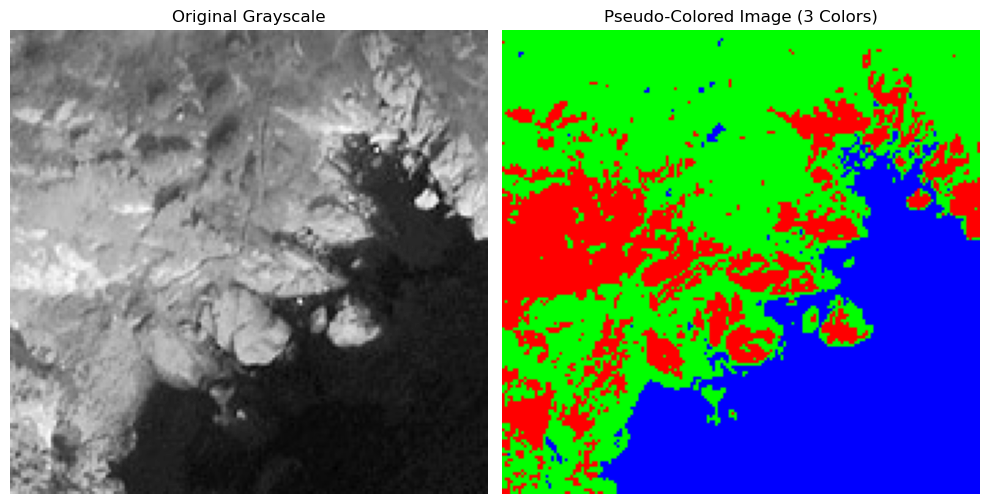

In [2]:
"""
This program demonstrates how to convert a grayscale image into a pseudo-colored image 
using three distinct colors based on intensity ranges. Pseudo-coloring is a technique 
to enhance visual interpretation by mapping intensity values to specific colors.

Steps and functionality of the program:

1. **Load a grayscale image:**
   - The input is a single-channel grayscale image with intensity values ranging from 0 to 255.
   - OpenCV's `cv2.imread` is used to load the image in grayscale mode.

2. **Create a blank RGB image:**
   - An empty image with three channels (RGB) is initialized to store the pseudo-colored output.

3. **Map intensity ranges to colors:**
   - Intensity values are divided into three ranges:
     - Low intensity (0–85): Blue
     - Medium intensity (86–170): Green
     - High intensity (171–255): Red
   - Each pixel's intensity value is checked, and the corresponding color is assigned.

4. **Display the original and pseudo-colored images:**
   - The original grayscale image and the pseudo-colored image are displayed side by side 
     using Matplotlib for easy comparison.

This simple program is useful for visualizing intensity variations in an image by applying 
a pseudo-color transformation.
"""

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the grayscale image

# Define the path to the grayscale image
image_path = os.path.join(os.getcwd(), 'data', 'images', 'worldview-1.jpg')  # Replace with your image path

# Check if the file exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image file not found: {image_path}")

# Load the image in grayscale mode
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Validate that the image was loaded successfully
if gray_image is None:
    raise ValueError(f"Failed to load the image at: {image_path}")



# Step 2: Create a blank RGB image
height, width = gray_image.shape
pseudo_color_image = np.zeros((height, width, 3), dtype=np.uint8)

# Step 3: Map intensity ranges to colors
for i in range(height):
    for j in range(width):
        intensity = gray_image[i, j]
        if intensity <= 85:  # Low intensity: Blue
            pseudo_color_image[i, j] = [255, 0, 0]  # BGR format (Blue)
        elif 86 <= intensity <= 170:  # Medium intensity: Green
            pseudo_color_image[i, j] = [0, 255, 0]  # BGR format (Green)
        else:  # High intensity: Red
            pseudo_color_image[i, j] = [0, 0, 255]  # BGR format (Red)

# Step 4: Convert the pseudo-color image to RGB for Matplotlib
pseudo_color_image_rgb = cv2.cvtColor(pseudo_color_image, cv2.COLOR_BGR2RGB)

# Step 5: Display the original and pseudo-colored images
plt.figure(figsize=(10, 5))

# Original grayscale image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale")
plt.axis("off")

# Pseudo-colored image
plt.subplot(1, 2, 2)
plt.imshow(pseudo_color_image_rgb)
plt.title("Pseudo-Colored Image (3 Colors)")
plt.axis("off")

plt.tight_layout()
plt.show()
